# Flow of a Mixture of Gases

According to 
https://www.mathesongas.com/pdfs/flowchart/RotameterGasFactorChart.pdf
the recipe to determine the flow of a gas mixture $\phi_{\text{mix}}$ is to calculate the weighted average of the gas factors $f_i$ 
$$ F = \sum_i{ f_i \frac{v_i}{V_{\text{tot}}}} $$
and to multiply the calibration for air $\phi_{\text{air}}(z)$ by it
$$ \phi_{\text{mix}}(z) = F \phi_{\text{air}}(z) $$. 

The weights are assumed to be the fractional volume of the mixture $\eta=\tfrac{v_i}{V_{\text{tot}}}$.

In the limiting case of a mixture formed by a single component $v_i=V_{\text{tot}}$, i.e., a fractional volume $\eta=1$, it should be possible to recover the calibration for that gas $\phi_{\text{gas}}(z)$ by using only the calibration relation for air and the gas factor under consideration.

$$  F=f_{\text{gas}} \Rightarrow \phi_{\text{gas}}(z) = f_{\text{gas}} \phi_{\text{air}}(z) $$

In other words, the calibration for a given gas can be obtained by multiplying the function that relates the position of the ball in the rotameter to the flow of air, scaled by the tabulated factor for that gas. 
Since I am interested in a gas mixture of Argon and Carbon Dioxide, I will show calculation for those gases only.

In [1]:
Ar_factor=0.851
CO2_factor=0.808

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
x=np.linspace(5.0,150.0,300)

## Calibration Curves

I am employing a E300 tube with the stencil 602 at NTP. The pressure in the tube is negligible and the stainless steel ball is the only one that can be used for both $\text{Ar}$ and $\text{CO}_2$. I will thus consider only the calibration curves for those conditions.

### AIR

In [3]:
ro,cal=np.loadtxt('AIR_602(E300)_GLASS_0_PSIG.dat',unpack=True) # sccm
airflow=interpolate.interp1d(ro, cal)

### ARGON

In [4]:
ro,cal=np.loadtxt('ARGON_602(E300)_GLASS_0_PSIG.dat',unpack=True) # sccm
arflow=interpolate.interp1d(ro, cal)

### CARBON DIOXIDE

In [5]:
ro,cal=np.loadtxt('CARBON_DIOXIDE_602(E300)_GLASS_0_PSIG.dat',unpack=True) # sccm
co2flow=interpolate.interp1d(ro, cal)

### Corrections to the Calibration

In [6]:
ArFlowCorr=airflow(x)*Ar_factor
CO2FlowCorr=airflow(x)*CO2_factor

## Plots

Comparison among different corrections

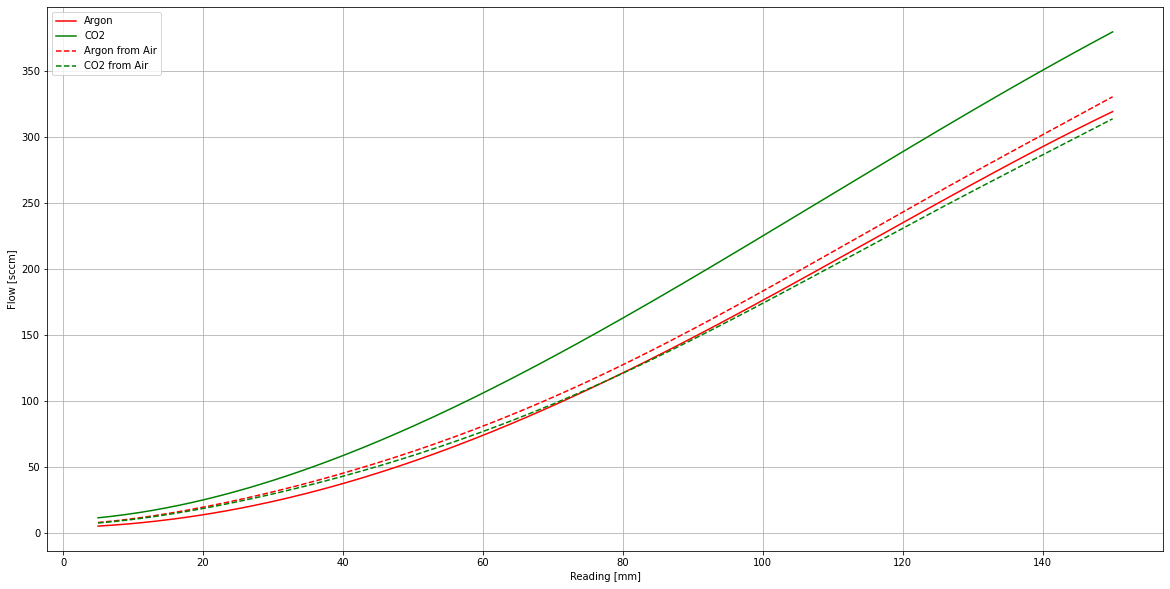

In [7]:
plt.plot(x, arflow(x),  'r',  label='Argon')
plt.plot(x, co2flow(x),  'g',  label='CO2')

plt.plot(x, ArFlowCorr,  'r--', label='Argon from Air')
plt.plot(x, CO2FlowCorr, 'g--', label='CO2 from Air')


plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
plt.legend(loc='upper left')
plt.show()

### Inverse Correction

In [8]:
airflow_ar=arflow(x)/Ar_factor
airflow_co2=co2flow(x)/CO2_factor

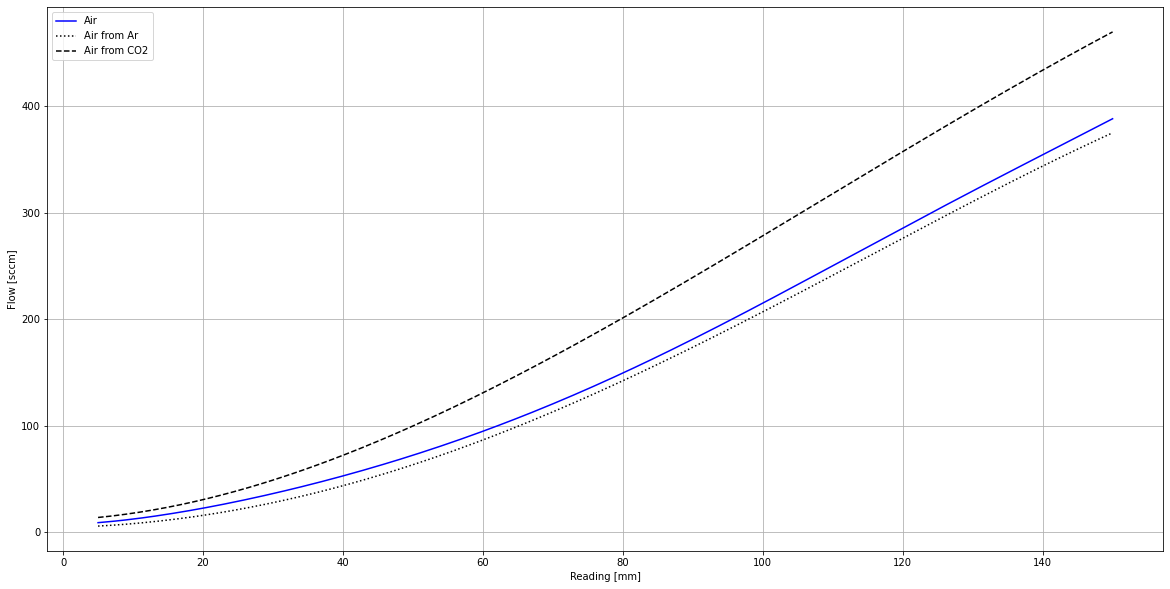

In [9]:
plt.plot(x, airflow(x), 'b-', label='Air')

plt.plot(x, airflow_ar, 'k:', label='Air from Ar')
plt.plot(x, airflow_co2, 'k--', label='Air from CO2')


plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
plt.legend(loc='upper left')
plt.show()

## Conclusion

Since the above plot shows that it is not possible to recover the calibration for a given gas (solid lines) from the calibration with air (dotted line) and the tabulated gas factor (dashed lines), I cannot trust using the same principle to determine the flow of a mixture.

$$ \phi_{\text{Ar}}(z) \neq f_{\text{Ar}} \phi_{\text{air}}(z) $$ 
and
$$ \phi_{\text{CO}_2}(z) \neq f_{\text{CO}_2} \phi_{\text{air}}(z)$$